In [49]:
import pandas as pd
import numpy as np
%matplotlib inline

In [53]:
df = pd.read_csv('c:\Research_data\lagged_analysis_2_ds.csv')
df.patientID = df.patientID.astype('category')
df.ds_lag_18_bin = df.ds_lag_18_bin.astype('category')


In [51]:
df.head()

,start_time,analysis.ds,breath_number,patientID,vent_settings.FiO2,vent_settings.PEEP,vent_settings.compliance,vent_settings.p_peak,vent_settings.set_VT,NMB,...,NMB_lag18,ds_lag_24,FiO2_diff_lag_24,PEEP_diff_lag_24,p_peak_diff_lag_24,set_VT_diff_lag_24,NMB_lag24,ds_lag_12_bin,ds_lag_18_bin,ds_lag_24_bin
0,2014-04-21 12:00:00,NaN,5.0,P100,40.000000,5.0,28.600000,25.600000,510.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-04-21 16:00:00,1.0,72.0,P100,40.000000,5.0,30.763889,23.000000,510.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-04-22 12:00:00,13.0,146.0,P100,40.000000,5.0,84.789855,15.904110,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-04-22 18:00:00,540.0,2144.0,P101,50.000000,10.0,70.057297,20.664179,410.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-04-22 20:00:00,304.0,1371.0,P101,72.808169,10.0,61.686869,22.427425,410.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:

df.dropna(subset=['ds_lag_18_bin'], axis=0, inplace=True)

In [29]:
gp = df.groupby(['ds_lag_18_bin', 'patientID',])

In [45]:
df.columns

Index(['start_time', 'analysis.ds', 'breath_number', 'patientID',
       'vent_settings.FiO2', 'vent_settings.PEEP', 'vent_settings.compliance',
       'vent_settings.p_peak', 'vent_settings.set_VT', 'NMB', 'NMB_sum',
       'ds_freq', 'ds_lag_12', 'FiO2_diff_lag_12', 'PEEP_diff_lag_12',
       'p_peak_diff_lag_12', 'set_VT_diff_lag_12', 'NMB_lag12', 'ds_lag_18',
       'FiO2_diff_lag_18', 'PEEP_diff_lag_18', 'p_peak_diff_lag_18',
       'set_VT_diff_lag_18', 'NMB_lag18', 'ds_lag_24', 'FiO2_diff_lag_24',
       'PEEP_diff_lag_24', 'p_peak_diff_lag_24', 'set_VT_diff_lag_24',
       'NMB_lag24', 'ds_lag_12_bin', 'ds_lag_18_bin', 'ds_lag_24_bin'],
      dtype='object')

In [31]:
gp['ds_lag_18_bin'].value_counts()

ds_lag_18_bin  patientID  ds_lag_18_bin
0.0            P103       0.0               2
               P105       0.0               4
               P106       0.0               3
               P110       0.0              11
               P113       0.0              21
               P114       0.0               4
               P117       0.0              11
               P119       0.0              35
               P120       0.0               7
               P121       0.0               5
               P122       0.0              48
               P124       0.0               7
               P125       0.0              18
               P126       0.0               3
               P127       0.0               5
               P129       0.0              36
1.0            P101       1.0               7
               P105       1.0               1
               P110       1.0              21
               P119       1.0               9
               P120       1.0           

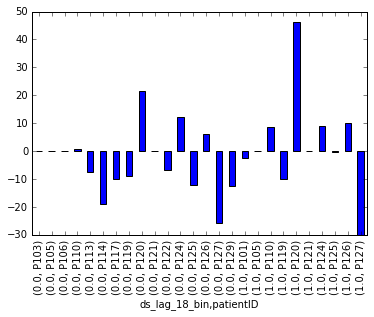

In [32]:
gp.FiO2_diff_lag_18.mean().plot(kind='bar')

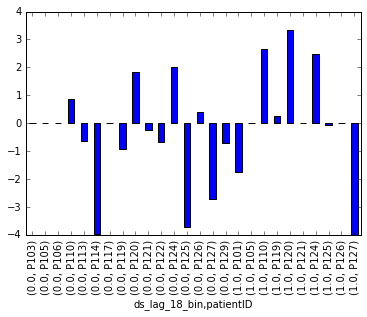

In [42]:
gp.PEEP_diff_lag_18.mean().plot(kind='bar')

In [48]:

gp.agg({'FiO2_diff_lag_18':np.mean, 'PEEP_diff_lag_18':np.mean})

FiO2_diff_lag_18  PEEP_diff_lag_18
ds_lag_18_bin patientID                                    
0.0           P103                    NaN               NaN
              P105                    NaN               NaN
              P106                    NaN               NaN
              P110               0.705308          0.867515
              P113              -7.671200         -0.624138
              P114             -18.965418         -3.990171
              P117             -10.000000               NaN
              P119              -8.757572         -0.910140
              P120              21.410527          1.816590
              P121                    NaN         -0.259197
              P122              -6.808678         -0.659062
              P124              12.190972          2.000000
              P125             -12.334837         -3.725028
              P126               6.177352          0.415646
              P127             -25.749552         -2.706808
              P129             -12.476158         -0.700274
1.0           P101              -2.516866         -1.767185
              P105                    NaN               NaN
              P110               8.636591          2.649409
              P119             -10.000000          0.256366
              P120              46.276068          3.322038
              P121                    NaN               NaN
              P124               8.957783          2.481333
              P125              -0.396601         -0.080737
              P126              10.000000               NaN
              P127             -30.000000         -4.000000